In [13]:
# Simulate an ODE

import control
from control.matlab import ctrb, place

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy import integrate
import matplotlib.pyplot as plt

In [22]:
# Examples

A = [[-1, 2], 
     [-2, -1]]

A = [[0, 1, 0],
     [0, -1, 1],
     [0, 2, -2]]

#pendulumn
#g = 9.8
#l = 0.1
#A = [[0, 1], 
#     [g/l, 0]]
#print(A)

#cart
#m = 1
#D0 = 1
#A = [[0, 1], 
#     [0, -D0/m]]
#print(A)

# get the size of matrix A
A = np.array(A)
n = A.shape[0] 

w,v=eig(A)
print('eigenvalues:', w)

# Define linear ODE
def f(t, x):
    return np.dot(A,x)

eigenvalues: [ 0.  0. -3.]


In [23]:
# Solve ODES
t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution  
x0 = np.random.uniform(-1, 1, n) # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for state x
x[0,:] = x0
x_norm = np.zeros(len(t))   # array for state norm x-norm
x_norm[0] = np.linalg.norm(x[0,:])
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

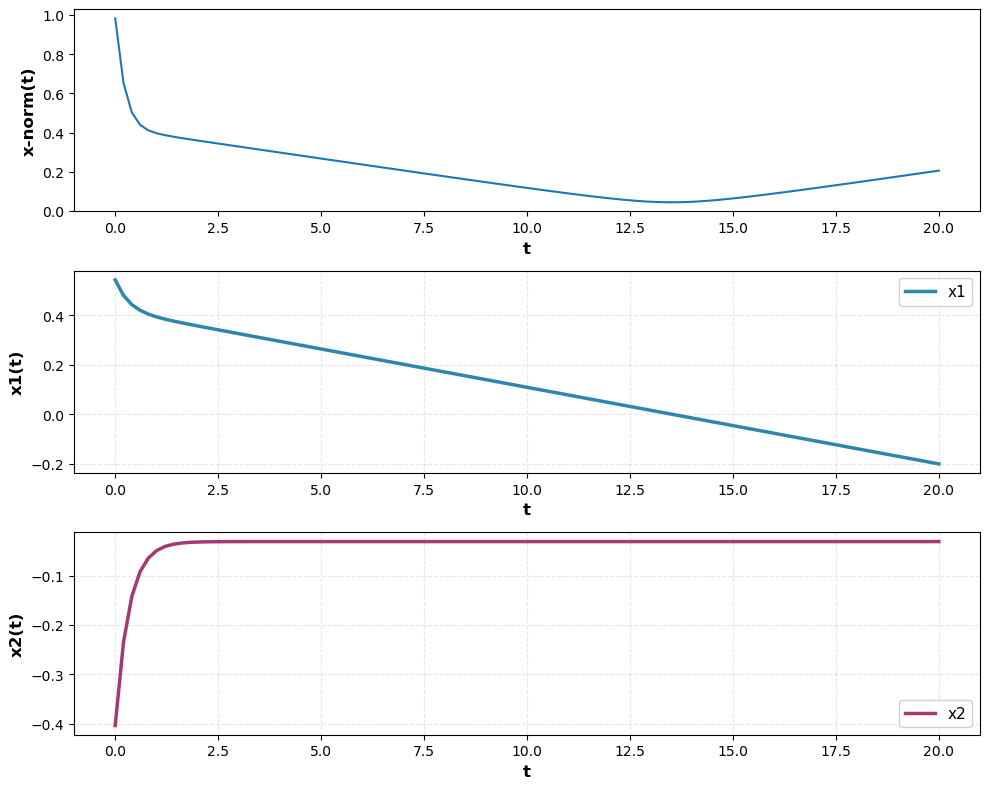

In [24]:
# Plot
for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   x_norm[i] = np.linalg.norm(x[i,:]) 
   if not r.successful():
       raise RuntimeError("Could not integrate")
# plt.plot(t, x)
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Plot State-norm
ax1.plot(t, x_norm)
ax1.set_xlabel('t', fontsize=12, fontweight='bold')
ax1.set_ylabel('x-norm(t)', fontsize=12, fontweight='bold')

# Plot first state
ax2.plot(t, x[:, 0], linewidth=2.5, color='#2E86AB', label='x1')
ax2.set_xlabel('t', fontsize=12, fontweight='bold')
ax2.set_ylabel('x1(t)', fontsize=12, fontweight='bold')
#ax2.set_xlabel('Time (s)', fontsize=12, fontweight='bold')
#ax2.set_ylabel('Position (m)', fontsize=12, fontweight='bold')
#ax2.set_title('Cart System - Position vs Time', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=11, framealpha=0.9)
ax2.tick_params(labelsize=10)

# Plot second state
ax3.plot(t, x[:, 1], linewidth=2.5, color='#A23B72', label='x2')
ax3.set_xlabel('t', fontsize=12, fontweight='bold')
ax3.set_ylabel('x2(t)', fontsize=12, fontweight='bold')
#ax3.set_xlabel('Time (s)', fontsize=12, fontweight='bold')
#ax3.set_ylabel('Velocity (m/s)', fontsize=12, fontweight='bold')
#ax3.set_title('Cart System - Velocity vs Time', fontsize=14, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(fontsize=11, framealpha=0.9)
ax3.tick_params(labelsize=10)

plt.tight_layout()
plt.show()